### Compare results

In [2]:
import json
import matplotlib.pyplot as plt

# Load all results
with open('../models/checkpoints/baseline_test_results.json') as f:
    baseline = json.load(f)

with open('../models/checkpoints/shortcut_test_results_corrupt.json') as f:
    shortcut_corrupt = json.load(f)

with open('../models/checkpoints/shortcut_test_results_clean.json') as f:
    shortcut_clean = json.load(f)

### Bar Plot

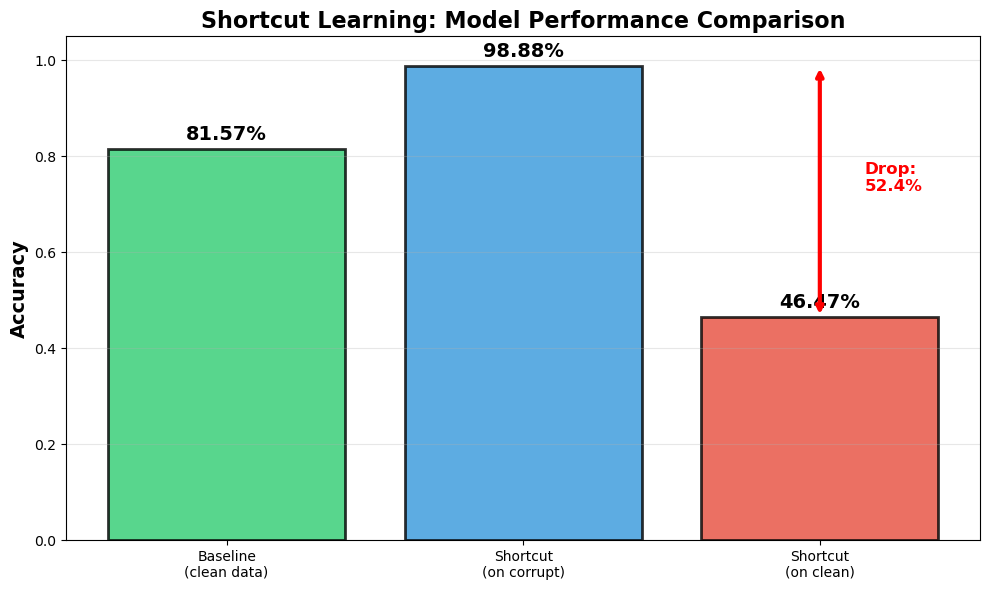

📊 Performance Drop: 52.40%
✅ Strong shortcut learning confirmed!


In [3]:
models = ['Baseline\n(clean data)', 'Shortcut\n(on corrupt)', 'Shortcut\n(on clean)']
accuracies = [baseline['accuracy'], shortcut_corrupt['accuracy'], shortcut_clean['accuracy']]
colors = ['#2ecc71', '#3498db', '#e74c3c']

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(models, accuracies, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# Add values on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.01,
           f'{acc:.2%}', ha='center', va='bottom', fontsize=14, fontweight='bold')

# Add drop annotation
drop = shortcut_corrupt['accuracy'] - shortcut_clean['accuracy']
ax.annotate('', xy=(2, shortcut_corrupt['accuracy']), xytext=(2, shortcut_clean['accuracy']),
           arrowprops=dict(arrowstyle='<->', color='red', lw=3))
ax.text(2.15, (shortcut_corrupt['accuracy'] + shortcut_clean['accuracy'])/2,
       f'Drop:\n{drop:.1%}', fontsize=12, color='red', fontweight='bold')

ax.set_ylabel('Accuracy', fontsize=14, fontweight='bold')
ax.set_title('Shortcut Learning: Model Performance Comparison', fontsize=16, fontweight='bold')
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/07_shortcut_learning_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"📊 Performance Drop: {drop:.2%}")
if drop > 0.20:
    print("✅ Strong shortcut learning confirmed!")